In [1]:
import numpy as np
import torch

from tqdm.auto import tqdm
from pathlib import Path

import itertools

import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv(), verbose=True)

True

In [2]:
from sklearn.metrics import pairwise_distances
from src.utils.analysis import my_save_memory_corrcoef, my_ultimate_save_memory_corrcoef

In [3]:
TEMP_DIR = Path('/data/huze/ray_results/algonauts2021/tmp/notebook-010/')

In [4]:
backbone_names = np.load(TEMP_DIR.joinpath(Path(f'all-loaded_backbone_names.npy')))

In [5]:
backbone_names

array(['2d_densnet_warp_3d', '3d_swin', '2d_bdcnvgg_warp_3d', 'i3d_flow',
       '2d_moby_swin_warp_3d', 'i3d_rgb', '2d_seg_swin_warp_3d',
       'audio_vggish', '2d_pyconvsegnet_warp_3d', '2d_simclr_warp_3d',
       '2d_colorizer_warp_3d'], dtype='<U23')

In [6]:
corr_save_dir = Path('/data/huze/ray_results/algonauts2021/tmp/notebook-014/')
corr_save_dir.mkdir(parents=True, exist_ok=True)

In [7]:
loaded_ve_shapes = []

In [8]:
for backbone_name in tqdm(backbone_names):
    print('running...', backbone_name)
    voxel_embeddings = np.load(TEMP_DIR.joinpath(Path(f'{backbone_name}-voxel_embeddings.npy')))
    loaded_ve_shapes.append(voxel_embeddings.shape)
    
    voxel_embeddings = torch.tensor(voxel_embeddings)
    corr = my_ultimate_save_memory_corrcoef(voxel_embeddings, chunk_size=8192)
    corr = corr.numpy()
    # torch.save(corr, corr_save_dir.joinpath(Path(f'{backbone_name}-corr.pt')))
    np.save(corr_save_dir.joinpath(Path(f'{backbone_name}-corr.npy')), corr)
    
    del voxel_embeddings
    del corr

  0%|          | 0/11 [00:00<?, ?it/s]

running... 2d_densnet_warp_3d


chunck:   0%|          | 0/20 [00:00<?, ?it/s]

normalize:   0%|          | 0/161326 [00:00<?, ?it/s]

running... 3d_swin


chunck:   0%|          | 0/20 [00:00<?, ?it/s]

normalize:   0%|          | 0/161326 [00:00<?, ?it/s]

running... 2d_bdcnvgg_warp_3d


chunck:   0%|          | 0/20 [00:00<?, ?it/s]

normalize:   0%|          | 0/161326 [00:00<?, ?it/s]

running... i3d_flow


chunck:   0%|          | 0/20 [00:00<?, ?it/s]

normalize:   0%|          | 0/161326 [00:00<?, ?it/s]

running... 2d_moby_swin_warp_3d


chunck:   0%|          | 0/20 [00:00<?, ?it/s]

normalize:   0%|          | 0/161326 [00:00<?, ?it/s]

running... i3d_rgb


chunck:   0%|          | 0/20 [00:00<?, ?it/s]

normalize:   0%|          | 0/161326 [00:00<?, ?it/s]

running... 2d_seg_swin_warp_3d


chunck:   0%|          | 0/20 [00:00<?, ?it/s]

normalize:   0%|          | 0/161326 [00:00<?, ?it/s]

running... audio_vggish


chunck:   0%|          | 0/20 [00:00<?, ?it/s]

normalize:   0%|          | 0/161326 [00:00<?, ?it/s]

running... 2d_pyconvsegnet_warp_3d


chunck:   0%|          | 0/20 [00:00<?, ?it/s]

normalize:   0%|          | 0/161326 [00:00<?, ?it/s]

chunck:   0%|          | 0/20 [00:00<?, ?it/s]

normalize:   0%|          | 0/161326 [00:00<?, ?it/s]

running... 2d_colorizer_warp_3d


chunck:   0%|          | 0/20 [00:00<?, ?it/s]

normalize:   0%|          | 0/161326 [00:00<?, ?it/s]

In [7]:
# all

In [11]:
loaded_ve_shapes = np.asarray(loaded_ve_shapes)

In [12]:
full_shape = (loaded_ve_shapes[0, 0], loaded_ve_shapes[:, 1].sum())

In [13]:
full_shape

(161326, 391168)

In [8]:
full_shape = (161326, 391168)

In [9]:
full_shape

(161326, 391168)

In [10]:
full_voxel_embedding = np.zeros(shape=full_shape, dtype=np.float32)

In [11]:
ws = np.load(TEMP_DIR.joinpath(Path(f'all-backbone_ensemble_ws.npy')))

In [12]:
start = 0
for i, backbone_name in enumerate(tqdm(backbone_names)):
    print('loading...', backbone_name)
    voxel_embeddings = np.load(TEMP_DIR.joinpath(Path(f'{backbone_name}-voxel_embeddings.npy')))
    voxel_embeddings *= ws[i]
    
    end = start + voxel_embeddings.shape[1]
    full_voxel_embedding[:, start:end] = voxel_embeddings
    
    start = end

  0%|          | 0/11 [00:00<?, ?it/s]

loading... 2d_densnet_warp_3d
loading... 3d_swin
loading... 2d_bdcnvgg_warp_3d
loading... i3d_flow
loading... 2d_moby_swin_warp_3d
loading... i3d_rgb
loading... 2d_seg_swin_warp_3d
loading... audio_vggish
loading... 2d_pyconvsegnet_warp_3d
loading... 2d_simclr_warp_3d
loading... 2d_colorizer_warp_3d


In [13]:
full_voxel_embedding.shape

(161326, 391168)

In [14]:
del voxel_embeddings

In [15]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           503G        240G         26G         16K        236G        260G
Swap:          7.6G        846M        6.8G


In [16]:
backbone_name = 'all'
print('running...', backbone_name)

full_voxel_embedding = torch.tensor(full_voxel_embedding)
corr = my_ultimate_save_memory_corrcoef(full_voxel_embedding, chunk_size=8192)
corr = corr.numpy()
# torch.save(corr, corr_save_dir.joinpath(Path(f'{backbone_name}-corr.pt')))
np.save(corr_save_dir.joinpath(Path(f'{backbone_name}-corr.npy')), corr)

running... all


minus mean:   0%|          | 0/391168 [00:00<?, ?it/s]

chunck:   0%|          | 0/20 [00:00<?, ?it/s]

normalize:   0%|          | 0/161326 [00:00<?, ?it/s]

In [17]:
del full_voxel_embedding
del corr

In [37]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

import torch.nn.functional as F

In [18]:
# reorder, downsample, save

In [65]:
backbone_names

array(['2d_densnet_warp_3d', '3d_swin', '2d_bdcnvgg_warp_3d', 'i3d_flow',
       '2d_moby_swin_warp_3d', 'i3d_rgb', '2d_seg_swin_warp_3d',
       'audio_vggish', '2d_pyconvsegnet_warp_3d', '2d_simclr_warp_3d',
       '2d_colorizer_warp_3d'], dtype='<U23')

In [164]:
for backbone_name in tqdm(backbone_names.tolist() + ['all']):
    if os.path.exists(f'tmp/notebook014/{backbone_name}-corr_od.npy'): continue
    print('running...', backbone_name)
    corr = np.load(corr_save_dir.joinpath(Path(f'{backbone_name}-corr.npy')))

    corr = torch.tensor(corr)

    km = torch.load(f'tmp/notebook011/{backbone_name}-kmeans.pt')
    Z = linkage(km.cluster_centers_, 'ward', optimal_ordering=True)
    dn = dendrogram(Z, get_leaves=True, color_threshold=0)
    plt.close()

    new_labels = np.ones_like(km.labels_) * -1
    new_order = np.asarray(dn['leaves'])
    k = km.n_clusters
    for i in range(k):
        new_labels[km.labels_ == new_order[i]] = i

    idx = np.argsort(new_labels)
    idx = torch.tensor(idx)
    
    np.save(f'tmp/notebook014/{backbone_name}-idx.npy', idx.numpy())
    
    corr = torch.index_select(corr, 0, idx)
    corr = torch.index_select(corr, 1, idx)
    ind = np.diag_indices(corr.shape[0])
    for i in ind[0]:
        corr[i, i] = 0

    down_s = 40

    out = F.avg_pool2d(corr.unsqueeze(0).unsqueeze(0), down_s)
    out = out.squeeze(0).squeeze(0)
    out = out.numpy()
    np.fill_diagonal(out, 0)

    np.save(f'tmp/notebook014/{backbone_name}-corr_od.npy', out)

    counts = np.unique(new_labels, return_counts=True)[1]
    cc = np.cumsum(counts).tolist()
    cc = np.asarray(cc)
    cc = cc / down_s
    cc = cc.astype('int').tolist()

    np.save(f'tmp/notebook014/{backbone_name}-cc.npy', cc)

  0%|          | 0/12 [00:00<?, ?it/s]

In [60]:
# plot

In [61]:
!mkdir tmp/notebook014/figs

In [63]:
backbone_names

array(['2d_densnet_warp_3d', '3d_swin', '2d_bdcnvgg_warp_3d', 'i3d_flow',
       '2d_moby_swin_warp_3d', 'i3d_rgb', '2d_seg_swin_warp_3d',
       'audio_vggish', '2d_pyconvsegnet_warp_3d', '2d_simclr_warp_3d',
       '2d_colorizer_warp_3d'], dtype='<U23')

In [71]:
from PIL import Image

In [154]:
def despines(ax):
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

In [146]:
label_rois = ['LOC', 'FFA', 'STS', 'EBA', 'PPA', 'V1', 'V2', 'V3', 'V4', 'others']

In [222]:
voxel_indices_dict = torch.load('tmp/notebook013/voxel_indices_dict.pt')

In [224]:
import matplotlib

In [240]:
# for vmax in [0.001, 0.0025, 0.005, 0.01]:
vmax = 0.0025
for backbone_name in tqdm(['all']+backbone_names.tolist()):
    out = np.load(f'tmp/notebook014/{backbone_name}-corr_od.npy')
    cc = np.load(f'tmp/notebook014/{backbone_name}-cc.npy')
    idx = np.load(f'tmp/notebook014/{backbone_name}-idx.npy')
    rgb_base = np.load(f'tmp/notebook013/{backbone_name}-rgb_base.npy')
    matched_colors = np.load(f'tmp/notebook013/{backbone_name}-matched_colors.npy')

    ht_roi_im = np.zeros((100, len(idx), 3))
    for i, voxel_indice in enumerate(voxel_indices_dict[backbone_name]):
        # ht_roi_im[:, voxel_indice] = rgb_base[i]
        ht_roi_im[:, voxel_indice] = matplotlib.colors.to_rgb(matched_colors[i])

    ht_roi_im = ht_roi_im[:, idx]
    ht_roi_im *= 255
    ht_roi_im = ht_roi_im.astype(np.uint8)

    ht_roi_im = Image.fromarray(ht_roi_im)
    ht_roi_im = ht_roi_im.resize((8000, 100))
    

#     fig, ax = plt.subplots(figsize=(20, 20))
#     ax.set_yticks(cc, minor=False)
#     ax.set_xticks(cc, minor=False)
#     ax.yaxis.grid(True, which='major', color='black', linestyle='-', linewidth=1)
#     ax.xaxis.grid(True, which='major', color='black', linestyle='-', linewidth=1)

#     plt.imshow(out, cmap='bwr', vmax=vmax, vmin=-vmax)
#     # plt.imshow(out, cmap='bwr')
#     # plt.title(f'{backbone_name}')
#     # plt.colorbar()
#     ax.xaxis.set_ticklabels([])
#     ax.yaxis.set_ticklabels([])
#     plt.tight_layout()
#     # plt.show()
#     plt.savefig(f'tmp/notebook014/figs/{backbone_name} corr matrix.png', dpi=400)
#     plt.close()
#     corr_im = Image.open(f'tmp/notebook014/figs/{backbone_name} corr matrix.png')
    dendro_im = Image.open(f'tmp/notebook012/sub figs/{backbone_name}-dendrogram.png')
    score_arr = np.load(f'tmp/notebook012/sub figs/{backbone_name}-score.npy')
    rois_arr = np.load(f'tmp/notebook012/sub figs/{backbone_name}-rois.npy')

    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(40*(91/102), 40),
                         gridspec_kw=dict(height_ratios=[10, 1, 80],
                                          width_ratios=[1]))
    axes = axs.flatten()
    # for ax in axes:
    #     ax.set_anchor('W')

    ax = axes[0]
    ax.imshow(dendro_im, )
    ax.axis('off')
    
    ax = axes[1]
    ax.imshow(ht_roi_im)
    # ax.set_yticks([50], ['htROI'], rotation=-0, rotation_mode='anchor',
    #               ha='left', fontsize=40)
    # ax.yaxis.tick_right()
    ax.set_yticks([])
    ax.set_xticks([])
    despines(ax)

#     ax = axes[2]
#     ax.imshow(score_arr, cmap='Reds',)
#     ax.set_yticks([50], ['score'], rotation=-0, rotation_mode='anchor',
#                   ha='left', fontsize=40)
#     ax.yaxis.tick_right()
#     ax.set_xticks([])
#     despines(ax)

#     ax = axes[3]
#     ax.imshow(rois_arr, cmap='Oranges')
#     ax.set_yticks([50+i*100 for i in range(10)], label_rois, rotation=-0, rotation_mode='anchor',
#                   ha='left', fontsize=36)
#     ax.yaxis.tick_right()
#     ax.set_xticks([])
#     despines(ax)

    ax = axes[2]
    ax.imshow(out, cmap='bwr', vmax=vmax, vmin=-vmax)
    ax.set_yticks(cc, minor=False)
    ax.set_xticks(cc, minor=False)
    ax.yaxis.grid(True, which='major', color='black', linestyle='-', linewidth=1)
    ax.xaxis.grid(True, which='major', color='black', linestyle='-', linewidth=1)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    despines(ax)

    plt.tight_layout()
    plt.savefig(f'tmp/notebook014/figs/{backbone_name} htROI plot.pdf', bbox_inches='tight')
    plt.close()
    # plt.show()
    # break

  0%|          | 0/12 [00:00<?, ?it/s]

In [237]:
def make_horizontal_color_bar(cmap, vmax, vmin, cbar_label_text='',
                              figsize=(10, 10), fontsize=20, offset=-1.1):
    plt.rcParams["font.weight"] = "bold"
    plt.rcParams["axes.labelweight"] = "bold"

    fig, ax = plt.subplots(figsize=figsize)

    data = np.array([[vmin, vmax]])

    cax = ax.imshow(data, cmap=cmap)
    plt.gca().set_visible(False)

    cbar = fig.colorbar(cax, ticks=[vmin, vmax], orientation='horizontal', )
    cbar.ax.set_xticklabels([f'{vmin:.4f}', f'{vmax:.4f}'], fontsize=fontsize)  # horizontal colorbar

    cbar.ax.text(0., offset, cbar_label_text, rotation=0, fontsize=fontsize, ha="center", va="center", zorder=10)
    return cbar

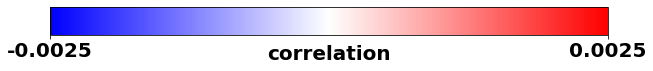

In [239]:
cbar_label_text = 'correlation'
cbar = make_horizontal_color_bar('bwr', vmax, -vmax, cbar_label_text=cbar_label_text, offset=-0.7)
plt.savefig('tmp/notebook014/figs/correlation cbar.pdf', bbox_inches="tight")
plt.show()

In [146]:
label_rois = ['LOC', 'FFA', 'STS', 'EBA', 'PPA', 'V1', 'V2', 'V3', 'V4', 'others']

In [146]:
label_rois = ['LOC', 'FFA', 'STS', 'EBA', 'PPA', 'V1', 'V2', 'V3', 'V4', 'others']

In [146]:
label_rois = ['LOC', 'FFA', 'STS', 'EBA', 'PPA', 'V1', 'V2', 'V3', 'V4', 'others']

In [154]:
def despines(ax):
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

In [146]:
label_rois = ['LOC', 'FFA', 'STS', 'EBA', 'PPA', 'V1', 'V2', 'V3', 'V4', 'others']

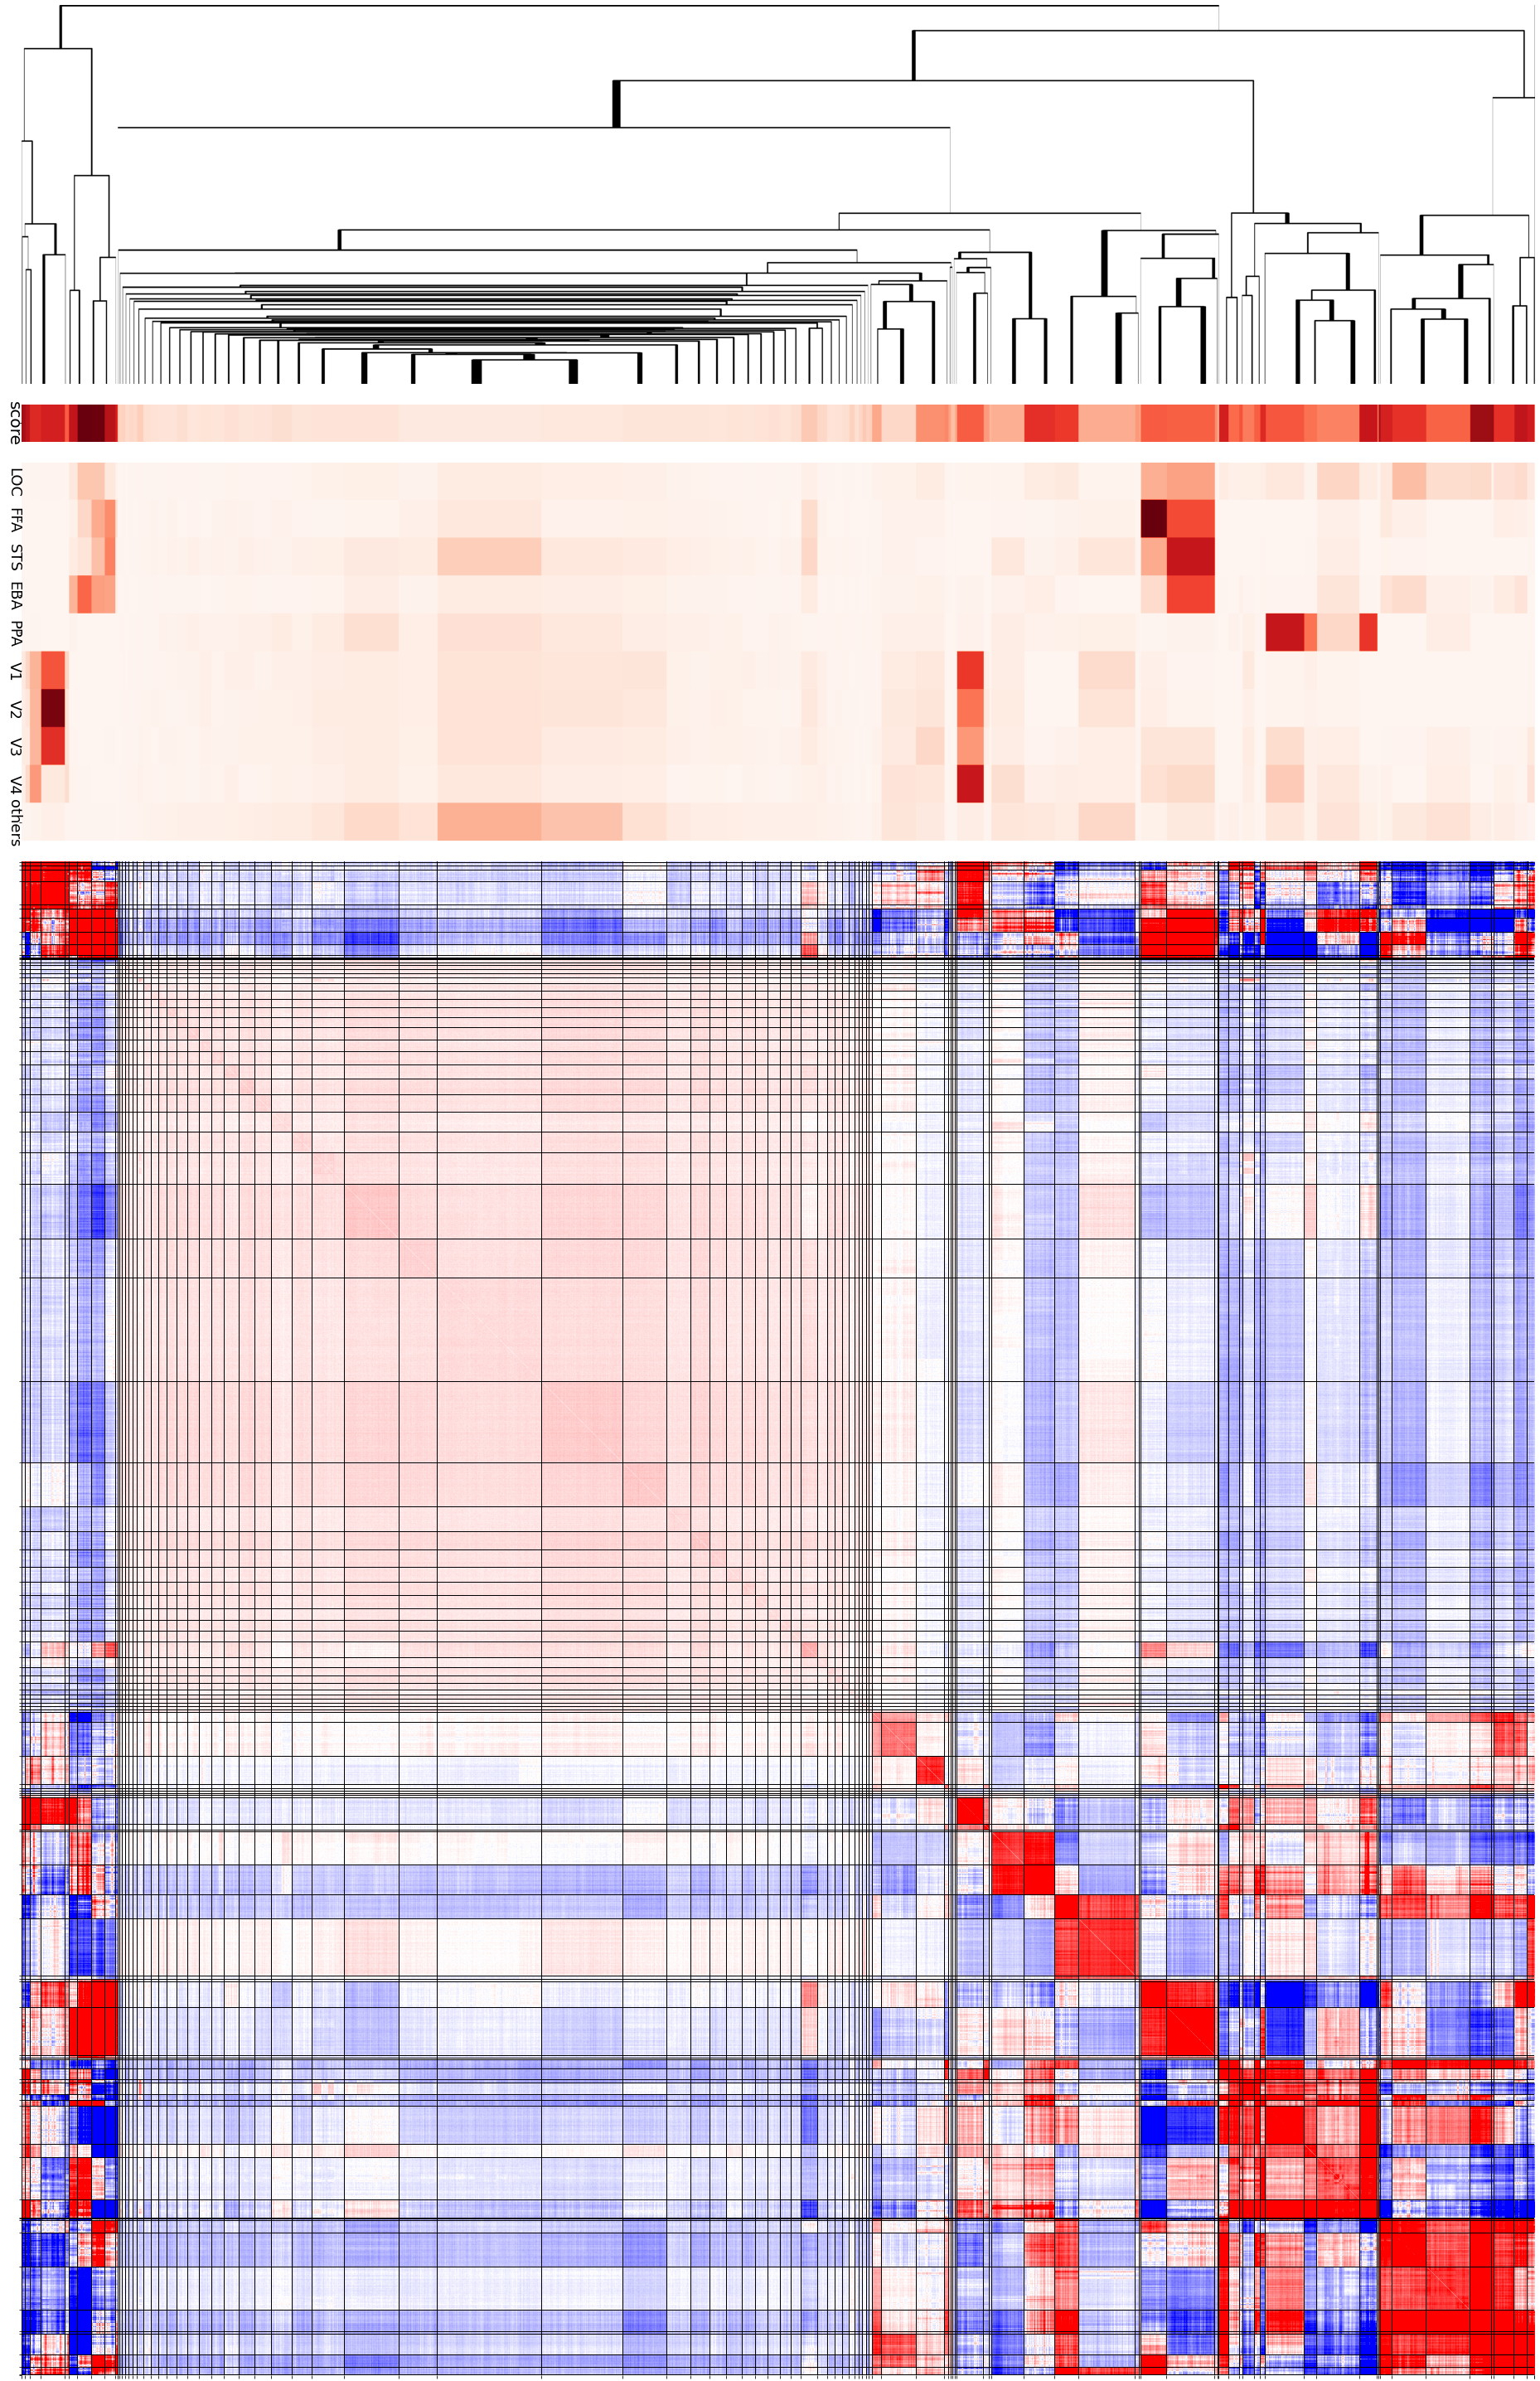

In [160]:
# sizes = [(12,3,), (12,3,), (12,3,), (12,12,)]

# axes = []
# for i, size in enumerate(sizes):
#     fig = plt.figure(figsize = size, dpi = 80, facecolor='white', edgecolor=None,linewidth=0.0, frameon=True, subplotpars=None)
#     ax = fig.add_subplot(111)
#     axes.append(ax)

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(40, 40),
                         gridspec_kw=dict(height_ratios=[10, 1, 10, 40],
                                          width_ratios=[1]))
axes = axs.flatten()
# for ax in axes:
#     ax.set_anchor('W')

ax = axes[0]
ax.imshow(dendro_im, )
ax.axis('off')

ax = axes[1]
ax.imshow(score_arr, cmap='Reds')
ax.set_yticks([100], ['score'], rotation=-90, rotation_mode='anchor',
              ha='center', fontsize=20)
ax.set_xticks([])
despines(ax)

ax = axes[2]
ax.imshow(rois_arr, cmap='Reds')
ax.set_yticks([100+i*200 for i in range(10)], label_rois, rotation=-90, rotation_mode='anchor',
              ha='center', fontsize=18)
ax.set_xticks([])
despines(ax)

ax = axes[3]
ax.imshow(out, cmap='bwr', vmax=vmax, vmin=-vmax)
ax.set_yticks(cc, minor=False)
ax.set_xticks(cc, minor=False)
ax.yaxis.grid(True, which='major', color='black', linestyle='-', linewidth=1)
ax.xaxis.grid(True, which='major', color='black', linestyle='-', linewidth=1)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
despines(ax)


plt.tight_layout()
plt.savefig('test.pdf')
plt.show()

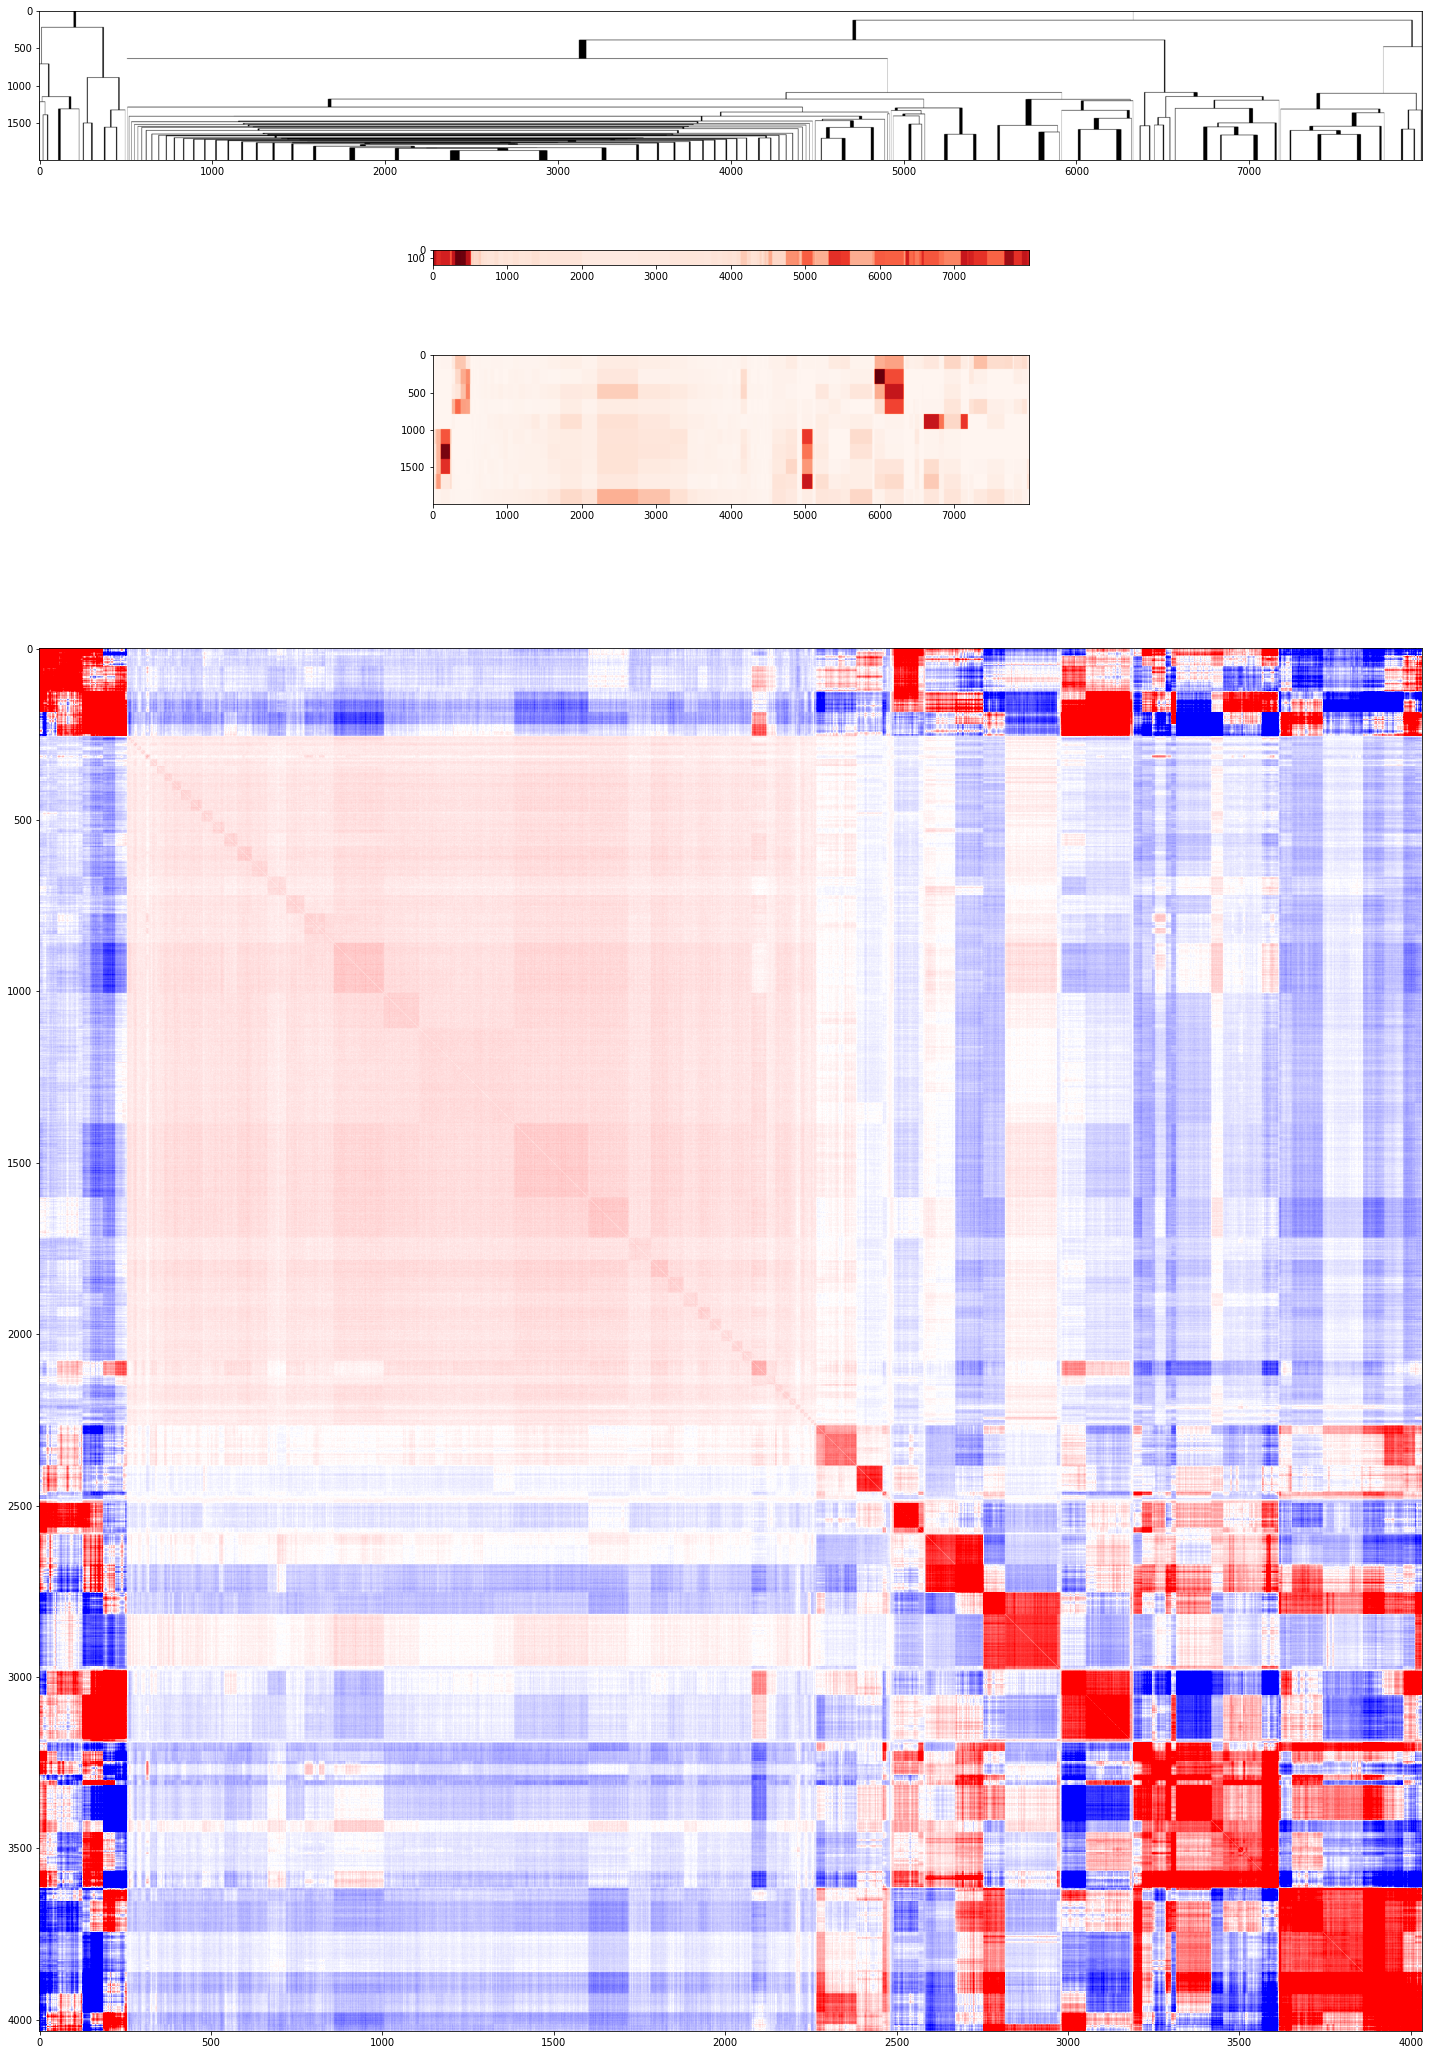

In [114]:
# fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(20, 20))
# axes = axs.flatten()
# for ax in axes:
#     ax.set_anchor('W')

fig = plt.figure(constrained_layout=False, figsize=(20, 36))
widths = [1]
heights = [1, 0.1, 1, 10]
spec = fig.add_gridspec(ncols=1, nrows=4, width_ratios=widths,
                          height_ratios=heights, left=0.02, right=0.98, wspace=0.05)


plt.sca(fig.add_subplot(spec[0, 0]))
plt.imshow(dendro_im, aspect='auto')

plt.sca(fig.add_subplot(spec[1, 0]))
plt.imshow(score_arr, cmap='Reds',)

plt.sca(fig.add_subplot(spec[2, 0]))
plt.imshow(rois_arr, cmap='Reds', )

plt.sca(fig.add_subplot(spec[3, 0]))
plt.imshow(out, cmap='bwr', vmax=vmax, vmin=-vmax)

fig.subplots_adjust(right=0.9, left=0.1, top=0.9, bottom=0.1, wspace=0.1)

plt.show()

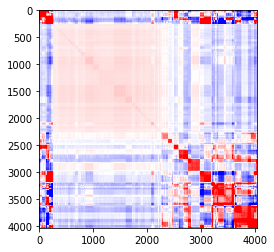

In [80]:
plt.imshow(out, cmap='bwr', vmax=vmax, vmin=-vmax)

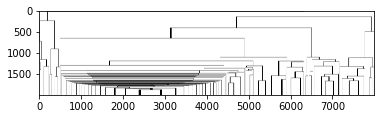

In [81]:
plt.imshow(dendro_im)

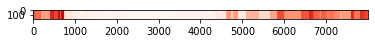

In [77]:

plt.imshow(score_arr, cmap='Reds')